# Machine Learning
## Packages for the day

pip install numpy
pip install scipy
pip install scikit-learn
pip install matplotlib
pip install pandas

### Where to start?
a handy graphic for what solution may be right: https://scikit-learn.org/stable/tutorial/machine_learning_map/


In [12]:
#Our Packages
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

## Supervised Learning
### supervised:When you have data with 'correct' examples of what you are trying to predict

### Regression: the output is a real value (a number eg: 1, 2, 2.5, 3.33333...)
Regression most closely resembles a classic math equation: y is some combination of variables x, each with their own weights, and possibly a global prior bias 
### y = mX + b 


In [5]:
#Defining our Input
clinical_df = pd.read_csv('https://raw.githubusercontent.com/fredhutchio/R_intro/master/extra/clinical.csv')

#choose all rows, and all columns EXCEPT the target for data
clinical_data = clinical_df.loc[:, clinical_df.columns != 'years_smoked']
cigarettes_input = clinical_data.loc[:, ['cigarettes_per_day']].fillna(value=0)
clinical_target = clinical_df.loc[:, ['years_smoked']].fillna(value=0)
print("Our input data: {}".format(cigarettes_input.describe()))
print("our target data: {}".format(cigarettes_input.describe()))

Our Dataframe:   primary_diagnosis tumor_stage  age_at_diagnosis vital_status morphology  \
0             C34.1    stage ia           24477.0         dead     8070/3   
1             C34.1    stage ib           26615.0         dead     8070/3   
2             C34.3    stage ib           28171.0         dead     8070/3   
3             C34.1    stage ia           27154.0        alive     8083/3   
4             C34.3   stage iib           29827.0         dead     8070/3   

   days_to_death state tissue_or_organ_of_origin  days_to_birth  \
0          371.0  live                     C34.1       -24477.0   
1          136.0  live                     C34.1       -26615.0   
2         2304.0  live                     C34.3       -28171.0   
3            NaN  live                     C34.1       -27154.0   
4          146.0  live                     C34.3       -29827.0   

  site_of_resection_or_biopsy  days_to_last_follow_up  cigarettes_per_day  \
0                       C34.1             

In [6]:
from sklearn.model_selection import train_test_split

#split our data into a TRAINING (make the model) and TESTING (evaluate how good the model is) set
X_train, X_test, y_train, y_test = train_test_split(cigarettes_input,
                                                    clinical_target,
                                                    test_size=0.2,
                                                    random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Our metrics for a regression model are different from a categorical model. Why?

### We instead use Mean Squared Error (a measure of the absolute distance from our estimates to the 'correct' answers
### And R^2 score (the variance score) which is a measure from 0 -> 1 of how much predictive power the model has. 1 is perfectly predictive, 0 is absolutely no predictive ability whatsoever

Coefficients: 
 [[ 3.67775143]]
Mean squared error: 95.68
Variance score: 0.29


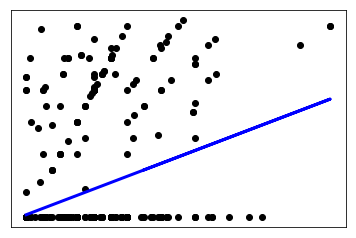

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test,y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Interpretting Results
We see that our predictive power is low, and that there are a number of 'years_smoked' entries that are 0, despite a large number of cigarettes smoked per day.

This doesn't mean that there is NO correlation between these two. In fact, this is just the beginning! What could be convoluting factors in how we prepared this problem?